# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
import csv as csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
counter = 0
randlat = []
randlngs = []
cities = []

# Create a set of random lat and lng combinations
while len(randlat)< 500:
    lats = np.random.uniform(low=-90, high=90)
    lngs = np.random.uniform(low=-180, high=180)
    randlat.append(lats)
    randlngs.append(lngs)            
    counter += 1
    
coord_df = pd.DataFrame({"lats":randlat, "lngs": randlngs})  
coord_df.head()
    



,lats,lngs
0,-47.772217,-90.126139
1,-81.032124,-112.506553
2,67.917540,62.027595
3,-17.155689,18.552026
4,-18.026701,159.201484


In [16]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)

634


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL to begin call
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + api_key

#Set up list for responses
date = []
country = []
lat = []
lon = []
temp_max = []
humidity = []
cloud = []
wind = []
_cities = []
print("Beginning Data Retrieval")

for city in cities:
    url_city = url + "&q=" + str(city)
    #print(url_city)
    #convert to json  
    try:
        city_data = requests.get(url_city).json()
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp_max.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity']) 
        cloud.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        _cities.append(city)
        print(f"retreiving data | {city}")
    except:
        print("If city is not found, skipping")
print("Retrieval is complete!")
data_dict = {'city': _cities,
                  'country': country,
                  'latitude': lat,
                  'longitude': lon,
                  'max temp': temp_max,
                  'humidity': humidity,
                  'cloudiness': cloud,
                  'windspeed': wind} 
                                               


Beginning Data Retrieval
retreiving data | codrington
retreiving data | tuktoyaktuk
retreiving data | ushuaia
retreiving data | castro
If city is not found, skipping
retreiving data | nkhata bay
retreiving data | amga
retreiving data | tessalit
retreiving data | punta arenas
If city is not found, skipping
retreiving data | hilo
retreiving data | hanyang
If city is not found, skipping
retreiving data | pacific grove
retreiving data | rikitea
retreiving data | bredasdorp
retreiving data | mercedes
retreiving data | narsaq
retreiving data | atuona
retreiving data | szendro
retreiving data | punganuru
If city is not found, skipping
retreiving data | talcahuano
retreiving data | bonavista
retreiving data | albany
retreiving data | jamestown
retreiving data | hobart
retreiving data | port elizabeth
retreiving data | maltahohe
retreiving data | busselton
retreiving data | half moon bay
retreiving data | bambous virieux
If city is not found, skipping
retreiving data | ashland
retreiving data |

retreiving data | vagur
retreiving data | nizhniy odes
retreiving data | bayji
retreiving data | west wendover
retreiving data | broadford
retreiving data | gizo
retreiving data | ambon
retreiving data | punta alta
retreiving data | iracoubo
If city is not found, skipping
retreiving data | marsa matruh
retreiving data | tura
retreiving data | wanning
If city is not found, skipping
retreiving data | jalu
retreiving data | dandong
retreiving data | houma
retreiving data | calama
retreiving data | waynesboro
If city is not found, skipping
retreiving data | angoche
retreiving data | praya
retreiving data | huarmey
retreiving data | cap malheureux
retreiving data | raudeberg
retreiving data | vanimo
retreiving data | phan thiet
retreiving data | hualmay
If city is not found, skipping
retreiving data | payo
retreiving data | thanh hoa
retreiving data | lasa
retreiving data | nago
retreiving data | ardakan
retreiving data | piterka
retreiving data | kutum
retreiving data | laguna
retreiving d

retreiving data | shingu
If city is not found, skipping
retreiving data | mariental
retreiving data | melito di porto salvo
If city is not found, skipping
retreiving data | eureka
retreiving data | eenhana
retreiving data | pendleton
If city is not found, skipping
retreiving data | ouricuri
retreiving data | ostrovnoy
retreiving data | fez
retreiving data | harboore
retreiving data | jeremie
retreiving data | tocache
retreiving data | morgan city
If city is not found, skipping
retreiving data | vardo
retreiving data | asosa
If city is not found, skipping
retreiving data | arlit
If city is not found, skipping
retreiving data | skjervoy
retreiving data | bethanien
retreiving data | sola
retreiving data | kpandae
If city is not found, skipping
retreiving data | egvekinot
retreiving data | waitati
If city is not found, skipping
retreiving data | bambanglipuro
retreiving data | shibetsu
retreiving data | shangrao
retreiving data | mandali
retreiving data | likasi
retreiving data | phalodi
r

In [18]:
#print(data_dict)
df = pd.DataFrame.from_dict(data_dict)
df.head()

,city,country,latitude,longitude,max temp,humidity,cloudiness,windspeed
0,codrington,AU,-28.95,153.24,17.78,87,90,1.00
1,tuktoyaktuk,CA,69.44,-133.03,3.00,93,90,9.80
2,ushuaia,AR,-54.81,-68.31,6.00,62,0,9.80
3,castro,CL,-42.48,-73.76,10.00,66,75,6.20
4,nkhata bay,MW,-11.61,34.30,18.73,77,2,1.03


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
df.count()

city          563
country       563
latitude      563
longitude     563
max temp      563
humidity      563
cloudiness    563
windspeed     563
dtype: int64

In [ ]:
#Convert file to csv and save
df.to_csv("weather_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

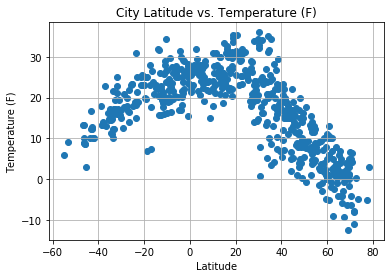

In [25]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["max temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature (F).png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

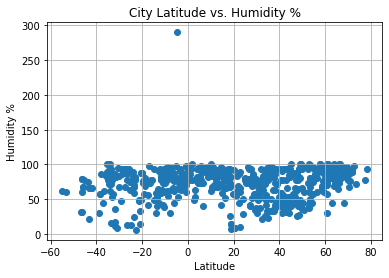

In [26]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity%.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

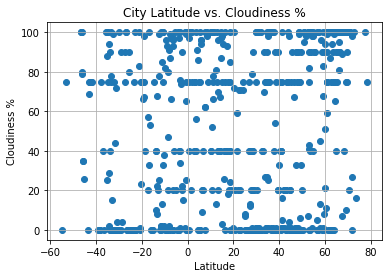

In [27]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Clouds%.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

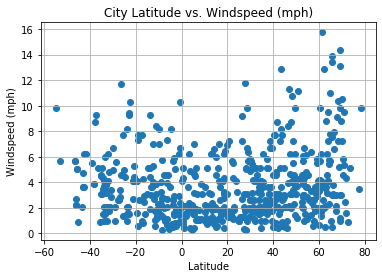

In [28]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (mph)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Windspeed(mph).png")

# Show plot
plt.show()